In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *

data_path='/content/drive/MyDrive/Colab Notebooks/DM/24_train_1.csv'

data = pd.read_csv(data_path)
# print(data.head(2))
# print(test.head(2))

In [2]:
data.shape

(1000, 3)

# **Pre-Processing the Data**

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

labels = data['Category'].unique()
labels = list(labels)
# type(labels)
print(labels)

['sport', 'business', 'tech', 'entertainment', 'politics']


In [4]:
dictionary_path = '/content/drive/MyDrive/Colab Notebooks/DM/dictionary.txt'

# word_dict = {}
# with open(dictionary_path,'r') as f:
#   for i,word in enumerate(f):
#     # word_dict[word[:len(word)-2]] = i
#     word_dict[word.strip()] = i

# print('Length of word_dict: ',len(word_dict))

dictionary = pd.read_csv(dictionary_path, header=None)
dictionary = list(dictionary[0])
# dictionary

In [5]:
cv = CountVectorizer(analyzer = 'word', ngram_range=(1, 3), stop_words='english', vocabulary=dictionary)
train_cv = cv.fit_transform(data['Text']).toarray()

tfidf = TfidfVectorizer(analyzer = 'word', ngram_range=(1, 3), stop_words='english', vocabulary=dictionary)
train_cv = tfidf.fit_transform(data['Text']).toarray()

#using tfidf
# tfidf = TfidfVectorizer(ngram_range=(1,3), vocabulary=dictionary)
# train_tfidf = tfidf.fit_transform(data['Text']).toarray()
# test_tfidf = tfidf.transform(test['Text']).toarray()

In [6]:
# print(train_cv)
data_train = train_cv[:,np.arange(len(dictionary))]
# X_train
# testing = test_cv[:,np.arange(len(dictionary))]
# X_test
category_train = data['Category']

# **Decision Tree Classifier**




**1. Randomly select 80% data instances as training, and the remaining 20% data instances as validation. Change the parameter setting on criterion (“gini”, “entropy”}. Draw a bar chart showing the training accuracy and validation accuracy w.r.t. different parameter values.**

In [7]:
from sklearn.model_selection import train_test_split
X = data_train
y = category_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [8]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Using Gini

In [9]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)
gini_acc = accuracy_score(y_train, clf.predict(X_train))
gini_pred = clf.predict(X_val)
gini_val_acc = (accuracy_score(y_val, gini_pred))


using Entropy

In [10]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
entropy_acc = accuracy_score(y_train, clf.predict(X_train))
entropy_pred = clf.predict(X_val)
entropy_val_acc = (accuracy_score(y_val, entropy_pred))


In [11]:
print('Trainning gini:',gini_acc)
print('Trainning entropy:',entropy_acc)
print('Validation gini:',gini_val_acc)
print('Validation entropy:',entropy_val_acc)


Trainning gini: 1.0
Trainning entropy: 1.0
Validation gini: 0.785
Validation entropy: 0.76


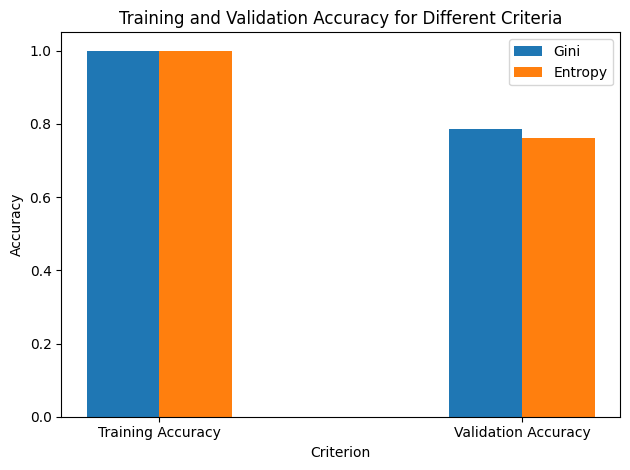

In [12]:
criteria = ['Training Accuracy', 'Validation Accuracy']
gini_accuracy = [gini_acc, gini_val_acc]
entropy_accuracy =[entropy_acc, entropy_val_acc]


x = np.arange(len(criteria))
width = 0.2


fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, gini_accuracy, width, label='Gini')
bar2 = ax.bar(x + width/2, entropy_accuracy, width, label='Entropy')

ax.set_xlabel('Criterion')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Validation Accuracy for Different Criteria')
ax.set_xticks(x)
ax.set_xticklabels(criteria)
ax.legend()


plt.tight_layout()
plt.show()

**Evaluate the decision tree using 5-fold cross-validation (see the example code for a different task here)**

In [13]:
from sklearn.model_selection import KFold
from sklearn import tree
X = data_train
y = category_train

def dtc_parameter_tune(train_val_X, train_val_y,parameter_name):
    if parameter_name=='min_samples_leaf':
      depths = [10,50,100,125,150,175,200]
    elif parameter_name == 'max_features':
      depths = ['log2','sqrt',None]
    train_acc_all = []
    val_acc_all = []
    train_std = []
    val_std = []
    kf = KFold(n_splits = 5)
    for depth in depths:
        train_acc = []
        val_acc = []
        # print("========= depth:", depth)
        for train_index, val_index in kf.split(train_val_X):
            ##########################
            train_X = train_val_X[train_index,:]
            val_X = train_val_X[val_index,:]

            train_y = train_val_y[train_index]
            val_y = train_val_y[val_index]

            dtc = tree.DecisionTreeClassifier(**{parameter_name:depth})
            dtc.fit(train_X, train_y)
            train_acc.append(dtc.score(train_X, train_y))
            val_acc.append(dtc.score(val_X, val_y))
            # print("========= val_index:", val_index)
            ##########################
        train_stds = np.std(train_acc)
        val_stds = np.std(val_acc)
        avg_train_acc = sum(train_acc) / len(train_acc)
        avg_val_acc = sum(val_acc) / len(val_acc)
        # print("Depth: ", depth)
        # print("Training accuracy: ", avg_train_acc * 100, "%")
        # print("Validation accuracy: ", avg_val_acc * 100, "%")
        train_std.append(train_stds)
        val_std.append(val_stds)
        train_acc_all.append(avg_train_acc)
        val_acc_all.append(avg_val_acc)
    # print(len(depths),len(train_acc_all),len(val_acc_all))
    table = pd.DataFrame({parameter_name:depths,'avg trainning accuracy':train_acc_all,'avg testing accuracy':val_acc_all,'trainning std':train_std,'validation std':val_std})
    return depths, train_acc_all, val_acc_all,table



In [14]:
def plot(depths, train_acc_all, val_acc_all,feature_name):
  plt.plot(depths, train_acc_all, marker='.', label="Training accuracy")
  plt.plot(depths, val_acc_all, marker='.', label="Validation accuracy")
  plt.xlabel(str(feature_name))
  plt.ylabel('Accuracy')
  plt.legend()

**w.r.t min_samples_leaf:<br>
Report the average training and validation accuracy, and their standard deviation for different parameter values (organize the results in a table)**

In [15]:
depths, train_acc_all, val_acc_all,table = dtc_parameter_tune(X, y,'min_samples_leaf')


In [16]:
# std = table.std()
# std

,min_samples_leaf,avg trainning accuracy,avg testing accuracy,trainning std,validation std
0,10,0.92450,0.878,0.008537,0.033853
1,50,0.68750,0.639,0.019333,0.025962
2,100,0.32000,0.310,0.029272,0.057009
3,125,0.30125,0.301,0.029864,0.055263
4,150,0.29850,0.294,0.018378,0.028879
5,175,0.27550,0.278,0.028390,0.058017
6,200,0.24850,0.253,0.017128,0.050656


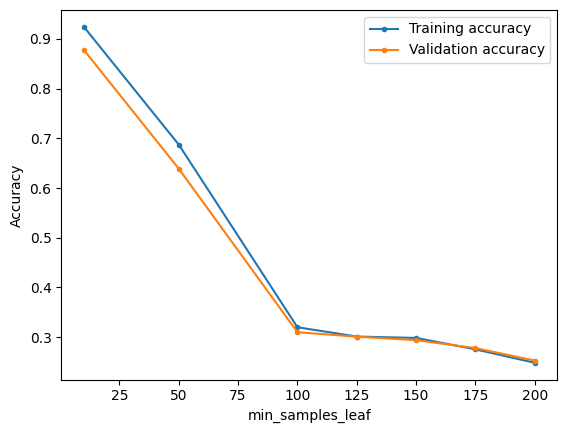

In [34]:
plot(depths, train_acc_all, val_acc_all,'min_samples_leaf' )
table

**Evaluate the decision tree using 5-fold cross-validation w.r.t max_features:<br>**
**1. Report the average training and validation accuracy, and their standard deviation for different parameter values (organize the results in a table). (5pt) <br>2. Draw a line figure showing the training and validation result, x-axis should be the parameter values, y-axis should be the training and validation accuracy.**

,max_features,avg trainning accuracy,avg testing accuracy,trainning std,validation std
0,log2,1.0,0.567,0.0,0.031718
1,sqrt,1.0,0.654,0.0,0.043977
2,None,1.0,0.740,0.0,0.052726


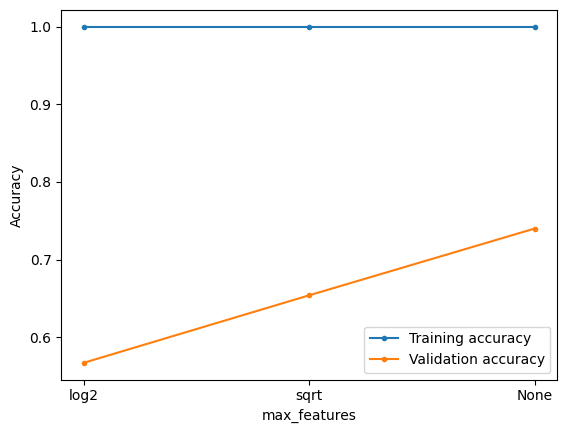

In [18]:
depths, train_acc_all, val_acc_all,table = dtc_parameter_tune(X, y,'max_features')

depths[2] = 'None'
plot(depths, train_acc_all, val_acc_all,'max_features' )
# max features takes only log2, sqrt or none as values
table

# **Random FOrest**

1. Evaluate random forests model on pre-processed training data. Describe your parameter setting.


In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion='gini',random_state=42)
rfc.fit(X,y)
rfc_gini_acc = accuracy_score(y_train, rfc.predict(X_train))
rfc_gini_pred = rfc.predict(X_val)
rfc_gini_val_acc = (accuracy_score(y_val, rfc_gini_pred))


In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion='entropy',random_state=42)
rfc.fit(X,y)
rfc_entropy_acc = accuracy_score(y_train, rfc.predict(X_train))
rfc_entropy_pred = rfc.predict(X_val)
rfc_entropy_val_acc = (accuracy_score(y_val, rfc_entropy_pred))



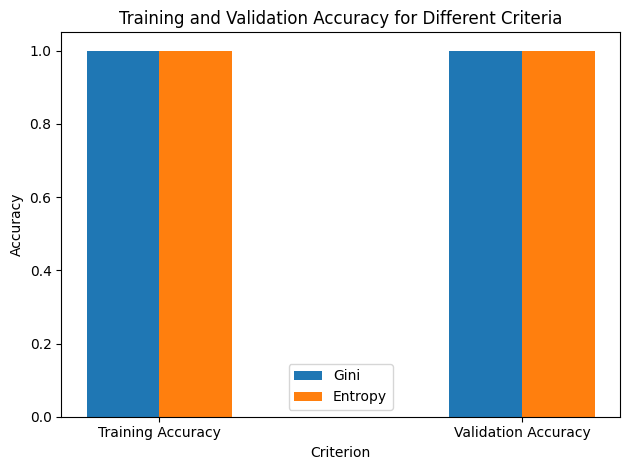

In [21]:
criteria = ['Training Accuracy', 'Validation Accuracy']
gini_accuracy = [rfc_gini_acc, rfc_gini_val_acc]
rfc_entropy_accuracy =[rfc_entropy_acc, rfc_entropy_val_acc]


x = np.arange(len(criteria))
width = 0.2


fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, gini_accuracy, width, label='Gini')
bar2 = ax.bar(x + width/2, rfc_entropy_accuracy, width, label='Entropy')

ax.set_xlabel('Criterion')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Validation Accuracy for Different Criteria')
ax.set_xticks(x)
ax.set_xticklabels(criteria)
ax.legend()


plt.tight_layout()
plt.show()

K-Fold Cross Validation

In [22]:
from sklearn.model_selection import KFold
from sklearn import tree
X = data_train
y = category_train
def dtc_parameter_tune(train_val_X, train_val_y,parameter_name):
    depths = [10,50,100,125,150,175,200]
    train_acc_all = []
    val_acc_all = []
    # acc_list = []
    # val_list = []
    train_std = []
    val_std = []
    kf = KFold(n_splits = 5)
    for depth in depths:
        train_acc = []
        val_acc = []
        # print("========= depth:", depth,"=========")
        for train_index, val_index in kf.split(train_val_X):
            ##########################
            train_X = train_val_X[train_index,:]
            val_X = train_val_X[val_index,:]

            train_y = train_val_y[train_index]
            val_y = train_val_y[val_index]

            dtc = RandomForestClassifier(criterion='entropy',max_depth=depth,**{parameter_name: depth})
            dtc.fit(train_X, train_y)
            train_acc.append(dtc.score(train_X, train_y))
            val_acc.append(dtc.score(val_X, val_y))
            # print("========= val_index:", val_index)
            ##########################

        avg_train_acc = sum(train_acc) / len(train_acc)
        avg_val_acc = sum(val_acc) / len(val_acc)
        train_stds = np.std(train_acc)
        val_stds = np.std(val_acc)
        # print("Training accuracy: ", avg_train_acc * 100, "%")
        # print("Validation accuracy: ", avg_val_acc * 100, "%")

        train_std.append(train_stds)
        val_std.append(val_stds)
        train_acc_all.append(avg_train_acc)
        val_acc_all.append(avg_val_acc)
        # df = pd.DataFrame({'Column1': list1, 'Column2': list2, 'Column3': list3})
    table = pd.DataFrame({parameter_name:depths,'avg trainning accuracy':train_acc_all,'avg testing accuracy':val_acc_all,'trainning std':train_std,'validation std':val_std})
    # table = pd.DataFrame({parameter_name:depths,'trainning accuracy':train_acc_all,'testing accuracy':val_acc_all})
    return depths, train_acc_all, val_acc_all,table



In [23]:
def plot(depths, train_acc_all, val_acc_all,feature_name):
  plt.plot(depths, train_acc_all, marker='.', label="Training accuracy")
  plt.plot(depths, val_acc_all, marker='.', label="Validation accuracy")
  plt.xlabel(feature_name)
  plt.ylabel('Accuracy')
  plt.legend()

n_estimators

,n_estimators,avg trainning accuracy,avg testing accuracy,trainning std,validation std
0,10,0.936,0.821,0.003984,0.028178
1,50,1.000,0.914,0.000000,0.020347
2,100,1.000,0.918,0.000000,0.022935
3,125,1.000,0.920,0.000000,0.022361
4,150,1.000,0.924,0.000000,0.023324
5,175,1.000,0.922,0.000000,0.024819
6,200,1.000,0.924,0.000000,0.020833


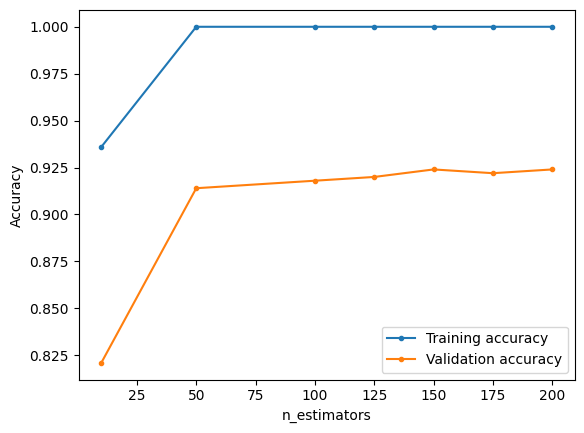

In [35]:
depths, train_acc_all, val_acc_all,table = dtc_parameter_tune(X, y,'n_estimators')

plot(depths, train_acc_all, val_acc_all,'n_estimators' )
(table)

min_samples_leaf


,min_samples_leaf,avg trainning accuracy,avg testing accuracy,trainning std,validation std
0,10,0.92575,0.871,0.004228,0.030887
1,50,0.67725,0.637,0.041021,0.023791
2,100,0.31850,0.311,0.032581,0.062081
3,125,0.28375,0.271,0.029707,0.054074
4,150,0.27975,0.275,0.033339,0.056745
5,175,0.26025,0.257,0.025204,0.047603
6,200,0.25400,0.251,0.023814,0.047053


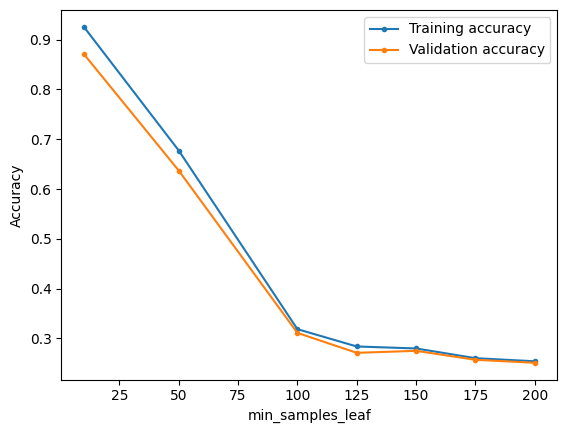

In [36]:
depths, train_acc_all, val_acc_all,table = dtc_parameter_tune(X, y,'min_samples_leaf')
plot(depths, train_acc_all, val_acc_all,'min_samples_leaf' )
# plot training/validation curves
(table)


# **Predict the labels for the testing data**

Pre-Processing Test Data

In [26]:
test_path = '/content/drive/MyDrive/Colab Notebooks/DM/news-test.csv'
test = pd.read_csv(test_path)

test_cv = cv.transform(test['Text']).toarray()
test_tfidf = tfidf.transform(test['Text']).toarray()


In [27]:
test.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [28]:
from sklearn.ensemble import RandomForestClassifier
X = data_train
y = category_train
rfc = RandomForestClassifier(min_samples_leaf=2,n_estimators=200,criterion='entropy',random_state=42)
rfc.fit(X,y)


RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       n_estimators=200, random_state=42)

In [29]:
test_pred = rfc.predict(test_tfidf)

In [30]:
# type(test['ArticleId'])
labels_df = pd.DataFrame({'Id':test['ArticleId'],'Class':test_pred})

In [42]:
# np.savetxt('/content/drive/MyDrive/Colab Notebooks/DM/lables.csv', test['ArticleId'],test_pred, delimiter=',',fmt='%s')  # Use '%f' for floating-point values
labels_df.to_csv('/content/drive/MyDrive/Colab Notebooks/DM/labels.csv',index=False,header=False)
# np.savetxt('output.csv', data, delimiter=',', header=','.join(column_names), comments='', fmt='%d')